In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# bin NCP data onto SLA grid
def NCP_bin(xbin, ybin, data):
    print data.columns
    var = data.columns
    binned = np.empty([len(xbin), len(ybin), len(var)])
    binnedstd = np.empty([len(xbin), len(ybin), len(var)])
    binsize = 0.25
    
    for i in range(len(xbin)):
        lon = xbin[i]
        for j in range(len(ybin)):
            lat = ybin[j]

            for k in range(len(var)):
                fvar = var[k]
                nn = len(data.loc[((data['Lon']>lon-binsize/2) & (data['Lon']<lon +binsize/2) & (data['Lat']>lat -binsize/2)
                                                  & (data['Lat']<lat +binsize/2)), fvar].values)
                
                if nn > 0:
                    binned[i,j,k] = np.nanmean(data.loc[((data['Lon']>lon-binsize/2) & (data['Lon']<lon +binsize/2) & (data['Lat']>lat - binsize/2)
                                                  & (data['Lat']<lat + binsize/2)), fvar].values)
                    binnedstd[i,j,k] = np.nanstd(data.loc[((data['Lon']>lon-binsize/2) & (data['Lon']<lon +binsize/2) & (data['Lat']>lat - binsize/2)
                                                  & (data['Lat']<lat + binsize/2)), fvar].values)

                else:
                    binned[i,j,k] = np.nan
                    binnedstd[i,j,k] = np.nan

                    
    return binned

In [3]:
# import data

maxlon = 171

Tok1 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo1_vSept16.csv', sep = ',')
Tok1['density'] = sw.rho(Tok1['S'].values,Tok1['T'].values,0)
Tok1 = Tok1[(Tok1['Lon']>110) & (Tok1['Lon']<maxlon)]

Tok3 = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tokyo3_vSept16.csv', sep = ',')
Tok3['density'] = sw.rho(Tok3['S'].values,Tok3['T'].values,0)
Tok3 = Tok3[(Tok3['Lon']>110) & (Tok3['Lon']<maxlon)]

Tian = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/Tianjin2_vSept16.csv', sep = ',')
Tian['density'] = sw.rho(Tian['S'].values,Tian['T'].values,0)
Tian = Tian[(Tian['Lon']>110) & (Tian['Lon']<maxlon)]

print Tian.columns

Index([u'Timestamp', u'Lat', u'Lon', u'S', u'T', u'Fluo', u'TrueO2Ar',
       u'O2Arsat', u'O2Arbiosat', u'MLD (WOA13)', u'Wkn', u'Air-sea flux',
       u'density'],
      dtype='object')


['../data/sla/dt_global_allsat_msla_h_20110519_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110520_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110923_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110924_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20110925_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20120727_20140106.nc', '../data/sla/dt_global_allsat_msla_h_20120728_20140106.nc']


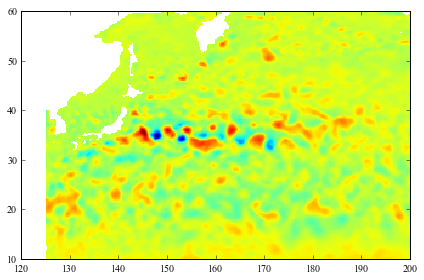

In [ ]:
# import SSH data

files = glob.glob('../data/sla/*.nc')
print files

Tok1_SSH = Dataset(files[0], mode='r')

Tok1_ssh = pd.DataFrame()

sla = np.squeeze(Tok1_SSH.variables['sla'][:])
lons = Tok1_SSH.variables['lon'][:]
lats = Tok1_SSH.variables['lat'][:]

Tok1_SSH.close()

sla = sla[400:600, 500:800]

plt.pcolormesh(lons[500:800], lats[400:600],sla, shading = 'flat')

plt.show()

Tok1_NCP_bin = NCP_bin(lons[500:700],lats[450:550], Tok1)


In [ ]:
print Tok1_NCP_bin

In [ ]:
Tok3_SSH = Dataset(files[2], mode='r')
sla = Tok3_SSH.variables['sla'][:]
lons = Tok3_SSH.variables['lon'][:]
lats = Tok3_SSH.variables['lat'][:]

Tok3_SSH.close()



In [ ]:
T_SSH = Dataset(files[5], mode='r')
sla = T_SSH.variables['sla'][:]
lons = T_SSH.variables['lon'][:]
lats = T_SSH.variables['lat'][:]

T_SSH.close()

